In [28]:
import numpy as np
import pandas as pd
data=pd.read_csv("../feature_extraction/yisijuji_liudiao_concat_data_without_normed.csv",dtype=object)
data=data.fillna('0.0')
data1=data.drop(['label'],axis=1)
data1=data1.drop(['Incident_GUID','num0','num2','false','false.1','false.2'],axis=1)
col_list3_english=['Disease_FoodborneCount','ExPosure_EatNum','acute gastroenteritis','infectious diarrhea','other','poisonous mushroom poisoning',
           'bean poisoning','botulism poisoning','nitrite poisoning','rhabdomyolysis syndrome','shellfish poisoning','other provinces','foreigners','local districts',
           'other districts in the city','other cities in the province','Hong Kong, Macao and Taiwan','kindergarten children','students','farmers','migrant workers','catering and food industry','medical workers',
           'careers and staff','retired staff','teachers','housework and unemployed','others','scattered children','workers','commercial services','herders','fishermen',
           'unknown','Disease_OtherIsill','family','food service industry','restaurant (hotel)','street food','food store','restaurant industry-other',
           'collective canteen','unit canteen','school canteen','site canteen','retail market','farmer market','supermarket','retail store','retail-other',
           'other','other','online shop','nan','family','family','catering service industry','restaurant (hotel)','street food','food store','catering industry-other',
           'collective canteen','unit canteen','school canteen','site canteen','retail market','farmer market','supermarket','retail store','retail-other','other',
           'other','rural banquet','rural banquet','school','nan.1','ExPosure_IsBuyDomestic','ExPosure_IsEatDomestic','ExPosure_OtherIsill',
           'food service industry','home-made','pre-packaged','bulk and simple packaging','others','meat and meat products','vegetables and their products',
           'fruits and their products','Aquatic animals and their products','infant food','milk and dairy products','eggs and egg products','beverages and frozen drinks',
           'packaged drinking water','cereals and their products','beans and bean products','nut seeds and their products',
           'fungus and its products','alcohol and its products','candy, chocolate, honey and its products','algae and its products','oil and fats','condiments','other foods',
           'multiple foods','mixed foods','unidentified foods','fever','flushing','pale','cyanosis','dehydration','thirst','edema','weight loss ',
           'chill','weakness','anemia','swelling','insomnia','mushy mouth','metallic','soap/salty','excessive saliva','foot/wrist drop ', 'pigmentation',
           'peeling','other','phobia','nausea','vomiting','abdominal pain','diarrhea traits','constipation','tenesmus','others','shortness of breath','hemoptysis' ,
           'dyspnea','other','chest tightness','chest pain','palpitation','shortness of breath','other','reduced urine output','back/kidney area pain','blood in urine', 'other',
           'kidney stones','headache','vertigo','coma','convulsions','convulsions','paralysis','speech difficulties','dysphagia','paresthesias','mental disorders',
           'diplopia','blurred vision','extremity numbness','peripheral sensory disturbance','pupillary abnormality','pingling sensation','other','itching','burning sensation','rash',
           'other','Disease_Address','Disease_Age','Disease_District','Disease_PatientUnit','Disease_SickTime',
           'Disease_TreatTime','ExPose_BuyDistrict','ExPosure_BuyAddress','ExPosure_EatAddress','ExPosure_EatDistrict',
           'ExPosure_Eattime','ExPosure_Name']
data1.columns=col_list3_english
# col_list=data1.columns.values.tolist()
# print(col_list)
# all_data=data1.values
label=data['label'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1.values, label, test_size=0.25, random_state=0)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

from xgboost import XGBClassifier
clf_xgboost = XGBClassifier(booster='gbtree',objective='binary:logistic',n_estimators=50,learning_rate=0.05,max_depth=4,max_delta_step=2)
clf_xgboost.fit(X_train,y_train)
from sklearn.metrics import  recall_score
y_predict=clf_xgboost.predict(X_test)
print(recall_score(y_test,y_predict))
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_predict)
print(f1)


0.9682804674457429
0.9523809523809524


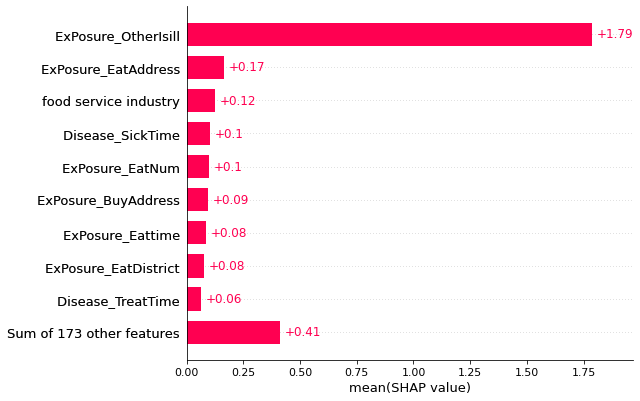

In [27]:
import shap
df=pd.DataFrame(X_train.astype(float))
df.columns=col_list3_english
explainer = shap.Explainer(clf_xgboost,df)
shap_values = explainer(df)
# print(shap_values)
# col_list3_english=['Disease_FoodborneCount','ExPosure_EatNum','acute gastroenteritis','infectious diarrhea','other','poisonous mushroom poisoning',
#            'bean poisoning','botulism poisoning','nitrite poisoning','rhabdomyolysis syndrome','shellfish poisoning','other provinces','foreigners','local districts',
#            'other districts in the city','other cities in the province','Hong Kong, Macao and Taiwan','kindergarten children','students','farmers','migrant workers','catering and food industry','medical workers',
#            'careers and staff','retired staff','teachers','housework and unemployed','others','scattered children','workers','commercial services','herders','fishermen',
#            'unknown','Disease_OtherIsill','family','food service industry','restaurant (hotel)','street food','food store','restaurant industry-other',
#            'collective canteen','unit canteen','school canteen','site canteen','retail market','farmer market','supermarket','retail store','retail-other',
#            'other','other','online shop','nan','family','family','catering service industry','restaurant (hotel)','street food','food store','catering industry-other',
#            'collective canteen','unit canteen','school canteen','site canteen','retail market','farmer market','supermarket','retail store','retail-other','other',
#            'other','rural banquet','rural banquet','school','nan.1','ExPosure_IsBuyDomestic','ExPosure_IsEatDomestic','ExPosure_OtherIsill',
#            'food service industry','home-made','pre-packaged','bulk and simple packaging','others','meat and meat products','vegetables and their products',
#            'fruits and their products','Aquatic animals and their products','infant food','milk and dairy products','eggs and egg products','beverages and frozen drinks',
#            'packaged drinking water','cereals and their products','beans and bean products','nut seeds and their products',
#            'fungus and its products','alcohol and its products','candy, chocolate, honey and its products','algae and its products','oil and fats','condiments','other foods',
#            'multiple foods','mixed foods','unidentified foods','fever','flushing','pale','cyanosis','dehydration','thirst','edema','weight loss ',
#            'chill','weakness','anemia','swelling','insomnia','mushy mouth','metallic','soap/salty','excessive saliva','foot/wrist drop ', 'pigmentation',
#            'peeling','other','phobia','nausea','vomiting','abdominal pain','diarrhea traits','constipation','tenesmus','others','shortness of breath','hemoptysis' ,
#            'dyspnea','other','chest tightness','chest pain','palpitation','shortness of breath','other','reduced urine output','back/kidney area pain','blood in urine', 'other',
#            'kidney stones','headache','vertigo','coma','convulsions','convulsions','paralysis','speech difficulties','dysphagia','paresthesias','mental disorders',
#            'diplopia','blurred vision','extremity numbness','peripheral sensory disturbance','pupillary abnormality','pingling sensation','other','itching','burning sensation','rash',
#            'other','Disease_Address','Disease_Age','Disease_District','Disease_PatientUnit','Disease_SickTime',
#            'Disease_TreatTime','ExPose_BuyDistrict','ExPosure_BuyAddress','ExPosure_EatAddress','ExPosure_EatDistrict',
#            'ExPosure_Eattime','ExPosure_Name']
shap.plots.bar(shap_values)

In [26]:
type(X_train)

numpy.ndarray

In [18]:
print(X_train.astype(float))

[[1.00e+00 1.00e+00 1.00e+00 ... 0.00e+00 9.54e+04 0.00e+00]
 [2.00e+00 5.00e+00 1.00e+00 ... 0.00e+00 0.00e+00 1.00e+02]
 [1.00e+00 8.00e+00 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [1.00e+00 1.10e+01 1.00e+00 ... 0.00e+00 1.26e+05 0.00e+00]
 [1.00e+00 2.50e+00 1.00e+00 ... 0.00e+00 3.06e+04 0.00e+00]
 [1.00e+00 2.00e+00 1.00e+00 ... 0.00e+00 4.32e+04 0.00e+00]]


In [30]:
#画shap图
import shap
shap.initjs()
df=pd.DataFrame(X_train.astype(float))
col_list3_english=['Disease_FoodborneCount','ExPosure_EatNum','acute gastroenteritis','infectious diarrhea','other','poisonous mushroom poisoning',
           'bean poisoning','botulism poisoning','nitrite poisoning','rhabdomyolysis syndrome','shellfish poisoning','other provinces','foreigners','local districts',
           'other districts in the city','other cities in the province','Hong Kong, Macao and Taiwan','kindergarten children','students','farmers','migrant workers','catering and food industry','medical workers',
           'careers and staff','retired staff','teachers','housework and unemployed','others','scattered children','workers','commercial services','herders','fishermen',
           'unknown','Disease_OtherIsill','family','food service industry','restaurant (hotel)','street food','food store','restaurant industry-other',
           'collective canteen','unit canteen','school canteen','site canteen','retail market','farmer market','supermarket','retail store','retail-other',
           'other','other','online shop','nan','family','family','catering service industry','restaurant (hotel)','street food','food store','catering industry-other',
           'collective canteen','unit canteen','school canteen','site canteen','retail market','farmer market','supermarket','retail store','retail-other','other',
           'other','rural banquet','rural banquet','school','nan.1','ExPosure_IsBuyDomestic','ExPosure_IsEatDomestic','ExPosure_OtherIsill',
           'food service industry','home-made','pre-packaged','bulk and simple packaging','others','meat and meat products','vegetables and their products',
           'fruits and their products','Aquatic animals and their products','infant food','milk and dairy products','eggs and egg products','beverages and frozen drinks',
           'packaged drinking water','cereals and their products','beans and bean products','nut seeds and their products',
           'fungus and its products','alcohol and its products','candy, chocolate, honey and its products','algae and its products','oil and fats','condiments','other foods',
           'multiple foods','mixed foods','unidentified foods','fever','flushing','pale','cyanosis','dehydration','thirst','edema','weight loss ',
           'chill','weakness','anemia','swelling','insomnia','mushy mouth','metallic','soap/salty','excessive saliva','foot/wrist drop ', 'pigmentation',
           'peeling','other','phobia','nausea','vomiting','abdominal pain','diarrhea traits','constipation','tenesmus','others','shortness of breath','hemoptysis' ,
           'dyspnea','other','chest tightness','chest pain','palpitation','shortness of breath','other','reduced urine output','back/kidney area pain','blood in urine', 'other',
           'kidney stones','headache','vertigo','coma','convulsions','convulsions','paralysis','speech difficulties','dysphagia','paresthesias','mental disorders',
           'diplopia','blurred vision','extremity numbness','peripheral sensory disturbance','pupillary abnormality','pingling sensation','other','itching','burning sensation','rash',
           'other','Disease_Address','Disease_Age','Disease_District','Disease_PatientUnit','Disease_SickTime',
           'Disease_TreatTime','ExPose_BuyDistrict','ExPosure_BuyAddress','ExPosure_EatAddress','ExPosure_EatDistrict',
           'ExPosure_Eattime','ExPosure_Name']
df.columns=col_list3_english
explainer = shap.Explainer(clf_xgboost,df)
shap_values = explainer(df)
print(shap_values)

.values =
array([[ 0.00066233, -0.11245849, -0.01878085, ...,  0.0068267 ,
        -0.0841542 , -0.02212966],
       [ 0.00119002,  0.01644492, -0.05039468, ...,  0.05449168,
         0.08003748,  0.02121225],
       [ 0.00071051,  0.05932848,  0.13297963, ...,  0.10715043,
         0.07391344, -0.04303957],
       ...,
       [ 0.00066233,  0.15384044, -0.0407785 , ...,  0.00730419,
        -0.09371741, -0.02594914],
       [ 0.00050235, -0.10614559, -0.02996259, ...,  0.00529166,
        -0.07741848, -0.01806697],
       [ 0.00050235, -0.09710196, -0.02811046, ...,  0.00499965,
        -0.07711727, -0.02624056]])

.base_values =
array([0.13660149, 0.13660149, 0.13660149, ..., 0.13660149, 0.13660149,
       0.13660149])

.data =
array([[1.00e+00, 1.00e+00, 1.00e+00, ..., 0.00e+00, 9.54e+04, 0.00e+00],
       [2.00e+00, 5.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+02],
       [1.00e+00, 8.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [1.00e+00, 1.10e+01

In [48]:
explainer.expected_value

0.13660148785478668

In [107]:
print(df['ExPosure_EatDistrict'].tolist())

[0.0, 0.0, 0.0, 0.5828610195925293, 0.0, 0.0, 0.0, 0.32246049670339233, 1.9216846505852334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8414628235430284, 0.69057041029443, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.861214614901666, 108.58650526086298, 0.0, 0.0, 0.0, 1.1841873034115429, 0.26244039560920823, 0.0, 0.0, 0.0, 0.0, 0.0745698076383104, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 49.679536468786026, 1.5556448383502701, 0.781099535274827, 2.1087726449495796, 0.7848249539939973, 0.11372256895841117, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3328141834056949, 0.0, 0.0, 0.3643316804794719, 0.0, 83.91630498400025, 0.7234747397566849, 0.44766331835096657, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25946870297446406, 0.0, 3.935626026365624, 1.7787703847404017, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5030363422093547, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.848740649105248, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4726471508761565, 0.0, 0

In [105]:
shap.force_plot(explainer.expected_value, shap_values.values[48,:],df.iloc[48,:],link='logit')